# Desarrollo Proyecto Ciencia de Datos 
## Exxpliación conceptual : https://openaccess.uoc.edu/bitstream/10609/147105/1/EjemplosDeProyectosEnElAmbitoDeLaCienciaDeDatos.pdf
## Viajes en taxis ciudad de Nueva York

In [32]:
import pandas as pd
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt
import seaborn as sns

# ALGORITMOS A PROBAR
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# ESCALADOR - ESTANDARIZADOR
from sklearn.preprocessing import StandardScaler

#  SEPARADOR DE ARCHIVOS ENTRENAMIENTO Y TEST
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#METRICAS PARA MEDIR EXACTITUD - PRECISION ALGORITMOS
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics

%matplotlib inline

In [2]:
N = 5e6
data = pd.read_csv("F:/CAPACITACION/MODELO MLEARNING/RECURSOS PROPIOS/trip_data_1.csv", nrows=N)


In [3]:


# Lee el archivo CSV
# Supongamos que tienes una variable N definida anteriormente
fare_data = pd.read_csv("F:/CAPACITACION/MODELO MLEARNING/RECURSOS PROPIOS/trip_fare_1.csv", sep=',', nrows=N)

# Lista de columnas a seleccionar
fare_cols = [' payment_type', ' fare_amount', ' surcharge', ' mta_tax', ' tip_amount', ' tolls_amount', ' total_amount']


# Une los datos al DataFrame existente
data = data.join(fare_data[fare_cols])

# Elimina la variable fare_data para liberar memoria
del fare_data

# Muestra las primeras 10 filas del DataFrame data
print(data.head(10))


                          medallion                      hack_license  \
0  89D227B655E5C82AECF13C3F540D4CF4  BA96DE419E711691B9445D6A6307C170   
1  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
2  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
3  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   
4  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   
5  20D9ECB2CA0767CF7A01564DF2844A3E  598CCE5B9C1918568DEE71F43CF26CD2   
6  496644932DF3932605C22C7926FF0FE0  513189AD756FF14FE670D10B92FAF04C   
7  0B57B9633A2FECD3D3B1944AFC7471CF  CCD4367B417ED6634D986F573A552A62   
8  2C0E91FF20A856C891483ED63589F982  1DA2F6543A62B8ED934771661A9D2FA0   
9  2D4B95E2FA7B2E85118EC5CA4570FA58  CD2F522EEE1FF5F5A8D8B679E23576B3   

  vendor_id  rate_code store_and_fwd_flag      pickup_datetime  \
0       CMT          1                  N  2013-01-01 15:11:48   
1       CMT          1                  N  2013-01-06 00:18:35  

In [4]:
data.columns[:5]

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag'],
      dtype='object')

In [5]:
data.fare_amount.value_counts()

AttributeError: 'DataFrame' object has no attribute 'fare_amount'

In [6]:
nuevos_nombres = {'medallion': 'medallion',
                  ' hack_license': 'hack_license',
                  ' vendor_id': 'vendor_id',
                  ' pickup_datetime': 'pickup_datetime',
                  ' payment_type': 'payment_type',
                  ' fare_amount': 'fare_amount',
                  ' surcharge': 'surcharge',
                  ' mta_tax': 'mta_tax',
                  ' tip_amount': 'tip_amount',
                  ' tolls_amount': 'tolls_amount',
                  ' total_amount': 'total_amount'}

# Renombrar las columnas utilizando el diccionario
data = data.rename(columns=nuevos_nombres)

In [7]:
data.iloc[:5,:5]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N


In [8]:
data.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'payment_type', 'fare_amount', 'surcharge',
       'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount'],
      dtype='object')

(0.0, 300.0)

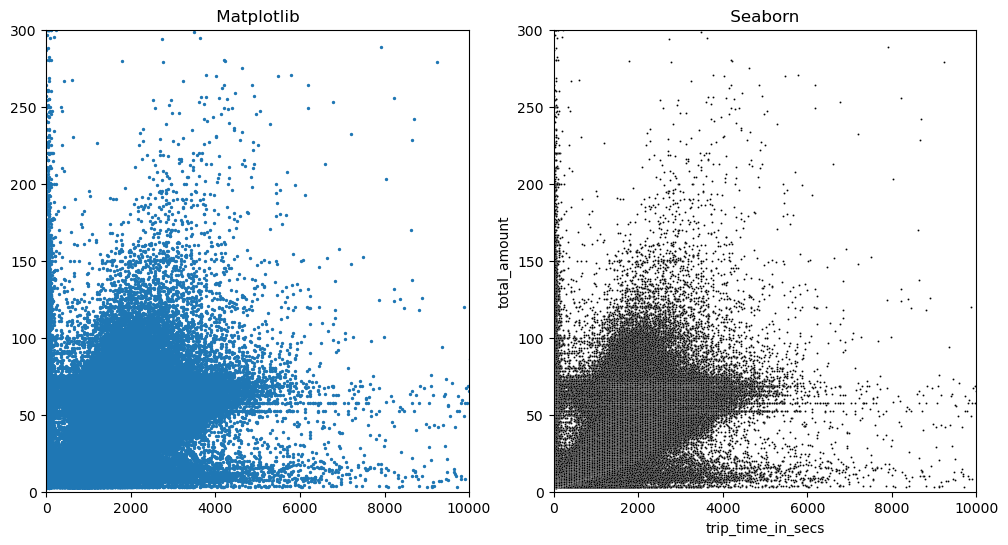

In [9]:
#graficos scatter
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.scatter(x=data['trip_time_in_secs'], y=data['total_amount'],  s=2)
plt.title(' Matplotlib ')
plt.xlim(0,1e4)
plt.ylim(0,300)

plt.subplot(1,2,2)
sns.scatterplot(x="trip_time_in_secs", y="total_amount", data=data, color="black", s=2)
plt.title(' Seaborn ')
plt.xlim(0,1e4)
plt.ylim(0,300)




In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 21 columns):
 #   Column              Dtype  
---  ------              -----  
 0   medallion           object 
 1   hack_license        object 
 2   vendor_id           object 
 3   rate_code           int64  
 4   store_and_fwd_flag  object 
 5   pickup_datetime     object 
 6   dropoff_datetime    object 
 7   passenger_count     int64  
 8   trip_time_in_secs   int64  
 9   trip_distance       float64
 10  pickup_longitude    float64
 11  pickup_latitude     float64
 12  dropoff_longitude   float64
 13  dropoff_latitude    float64
 14  payment_type        object 
 15  fare_amount         float64
 16  surcharge           float64
 17  mta_tax             float64
 18  tip_amount          float64
 19  tolls_amount        float64
 20  total_amount        float64
dtypes: float64(11), int64(3), object(7)
memory usage: 801.1+ MB


In [11]:
data.isnull().sum()
#data.shape

medallion                   0
hack_license                0
vendor_id                   0
rate_code                   0
store_and_fwd_flag    2432869
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
trip_time_in_secs           0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude          38
dropoff_latitude           38
payment_type                0
fare_amount                 0
surcharge                   0
mta_tax                     0
tip_amount                  0
tolls_amount                0
total_amount                0
dtype: int64

In [12]:
#borrando columnas con muchos con mas de 50% nulos y con datos de identificacion auto, chofer
data.drop(columns=['medallion','hack_license','store_and_fwd_flag'],inplace=True)
data.dropna(inplace=True)


In [13]:
data.isnull().sum()

vendor_id            0
rate_code            0
pickup_datetime      0
dropoff_datetime     0
passenger_count      0
trip_time_in_secs    0
trip_distance        0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
payment_type         0
fare_amount          0
surcharge            0
mta_tax              0
tip_amount           0
tolls_amount         0
total_amount         0
dtype: int64

In [ ]:
data.shape

# EDA EXPLORCION DE DATOS :
## DESAFIOS### 
Analizar los datos de las distribuciones e identificar si hay algún valor o registros que no se deben considerar para el modelo.### 

Investigar qué es y como crear un mapa de calor para analizar la correlación de las variable### .

Crear una conclusión para cada uno de los gráficos del histograma. Mirar los datos y extraer conclusiones.

#Hisitograms de variables continuas opcion basica 
grafico_barras = ['vendor_id', 'rate_code', 'passenger_count', 'payment_type']

for columna in grafico_barras:
        print('columna : ',columna)
        plt.figure(figsize=(12,6))

        cantidad = data[columna].value_counts()

        plt.subplot(1,3,1)
        plt.bar(cantidad.index, cantidad.values)
        plt.ylabel('Frecuencia')
        plt.xlabel(columna)
        plt.title(f'Columna  : {columna}')

        plt.subplot(1,3,2)
        sns.countplot(x=columna, data=data)
        plt.ylabel('Frecuencia')
        plt.xlabel(columna)
        plt.title(f'Columna  : {columna}')




columna sub 0  0
columna sub 0  1
columna sub 0  2
columna sub 0  3


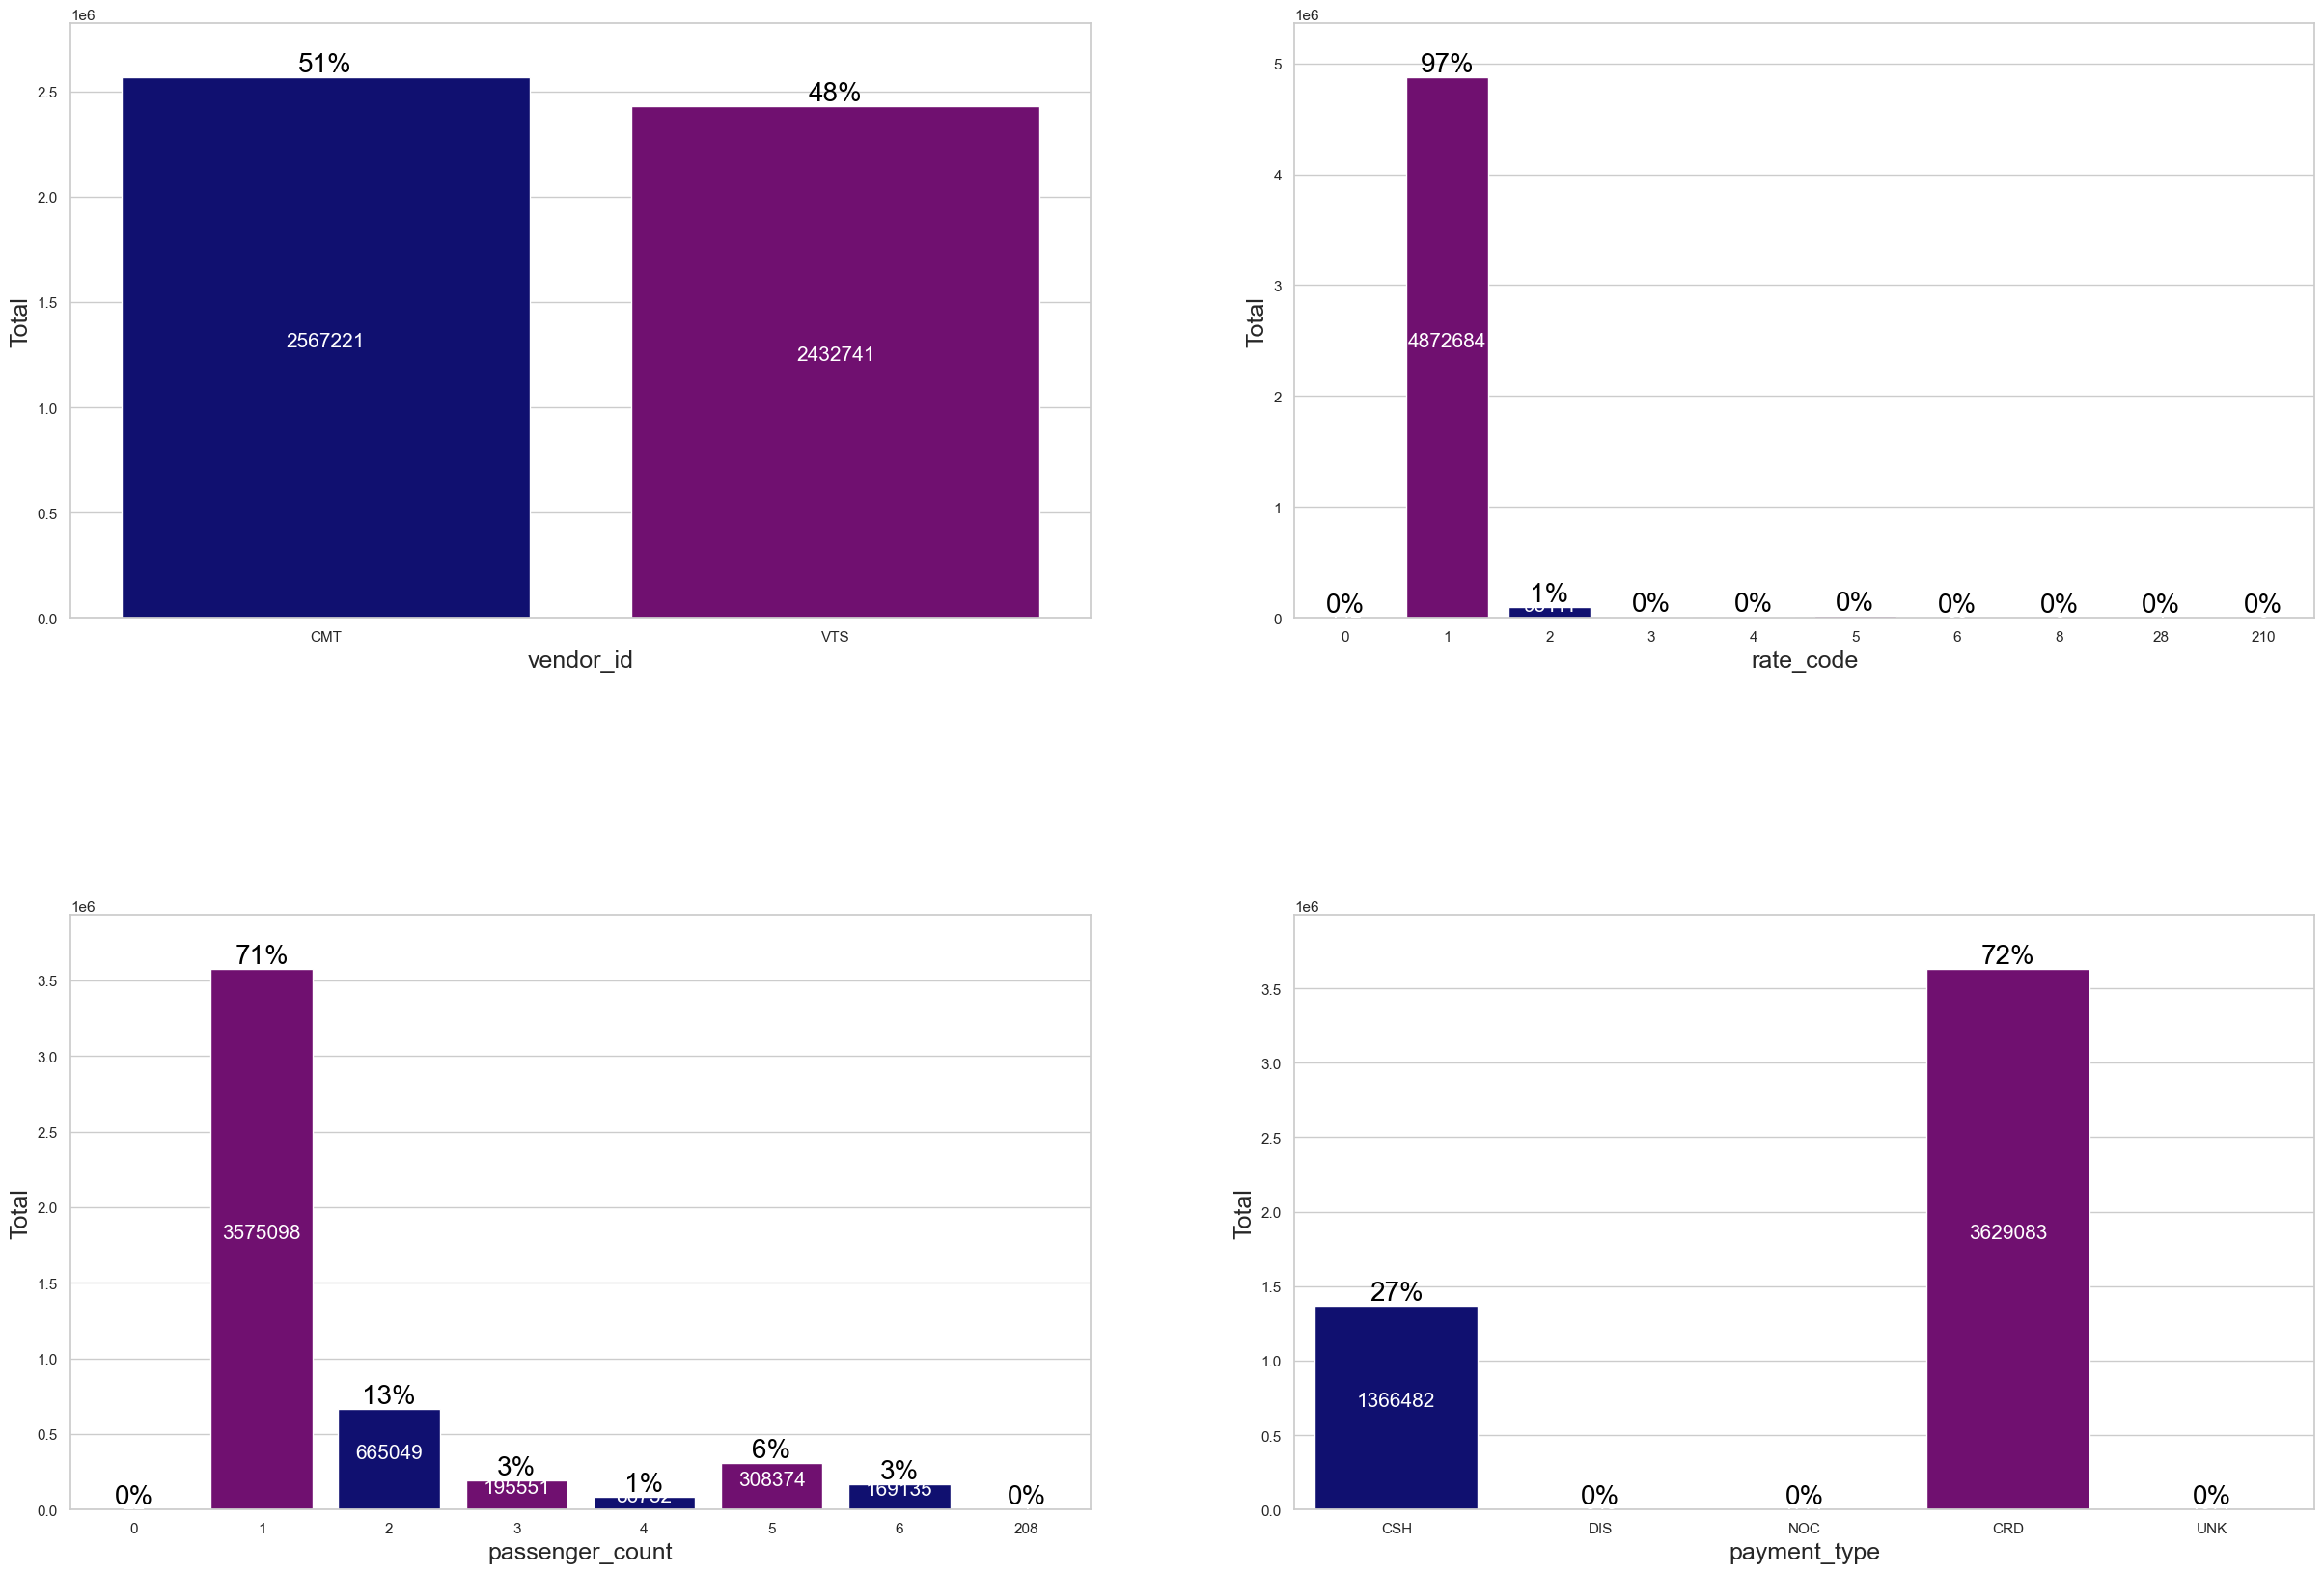

In [15]:
#Más graficos para explorar los datos variables categoricas

grafico_barras = list(['vendor_id', 'rate_code', 'passenger_count', 'payment_type'])
lista_grafico_barras = list(enumerate(grafico_barras))
total_observaciones = len(data) #Calcular observaciones

sns.set(style="whitegrid")
colors = sns.color_palette(['navy', 'purple'])
plt.figure(figsize=(30, 20))
plt.subplots_adjust(hspace=0.5)  # Ajustar espacio vertical subgráficos

#Itero por la lista de caracteristicas categoricas

for columna in lista_grafico_barras:
   print("columna sub 0 ", columna[0])
   plt.subplot(2, 2, columna[0] + 1)
   ax = sns.countplot(x=columna[1], data=data,  palette=colors, linewidth=1)
   plt.xlabel(columna[1], fontsize=18)
   plt.ylabel('Total', fontsize=18)

   # Ajustar la escala del eje y
   ax.set_ylim(0, data[columna[1]].value_counts().max() * 1.1)  #Aumentar el límite superior en un 10%

   for p in ax.patches: #Bucle
        x_pos = p.get_x() + p.get_width() / 2.
        y_pos_abs = p.get_height() / 2 + p.get_y()  # Para centrar absolutos :)
        y_pos_prop = p.get_height() / total_observaciones + p.get_y()  # Para centrar proporciones :)
        ax.annotate(f'{p.get_height():.0f}', (x_pos, y_pos_abs), #Mostrar absoluto de observaciones
                    ha='center', va='center', fontsize=15, color='white', xytext=(0, 5),
                    textcoords='offset points')
        porcentaje = p.get_height() / total_observaciones * 100
        ax.annotate(f'{int(porcentaje)}%', (x_pos, p.get_height()), #Mostrar porcentajes
                    ha='center', va='bottom', fontsize=20, color='black')


plt.show()

# EDA variables CONTINUAS OPCION BASICA
graficos_histo = data.select_dtypes(exclude='object')

for columna in graficos_histo:
       plt.figure(figsize=(10,4))

       plt.subplot(1,2,1)
       plt.hist(data[columna], bins=30, color='skyblue', edgecolor='black')
       plt.ylabel('Frecuencia')
       plt.xlabel(columna)
       plt.ylim(0, 5000000)
       plt.title(f' PLT Columna  : {columna}')

       plt.subplot(1,2,2)
       sns.histplot(data[columna], bins=30 , color='blue', edgecolor='black')
       plt.ylabel('Frecuencia')
       plt.xlabel(columna)
       plt.title(f' SNS Columna  : {columna}')




(0, 'rate_code')


C:\Users\victo\AppData\Local\Temp\ipykernel_13472\1634940841.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data[i[1]], bins=20 , palette=colors, edgecolor='black')
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


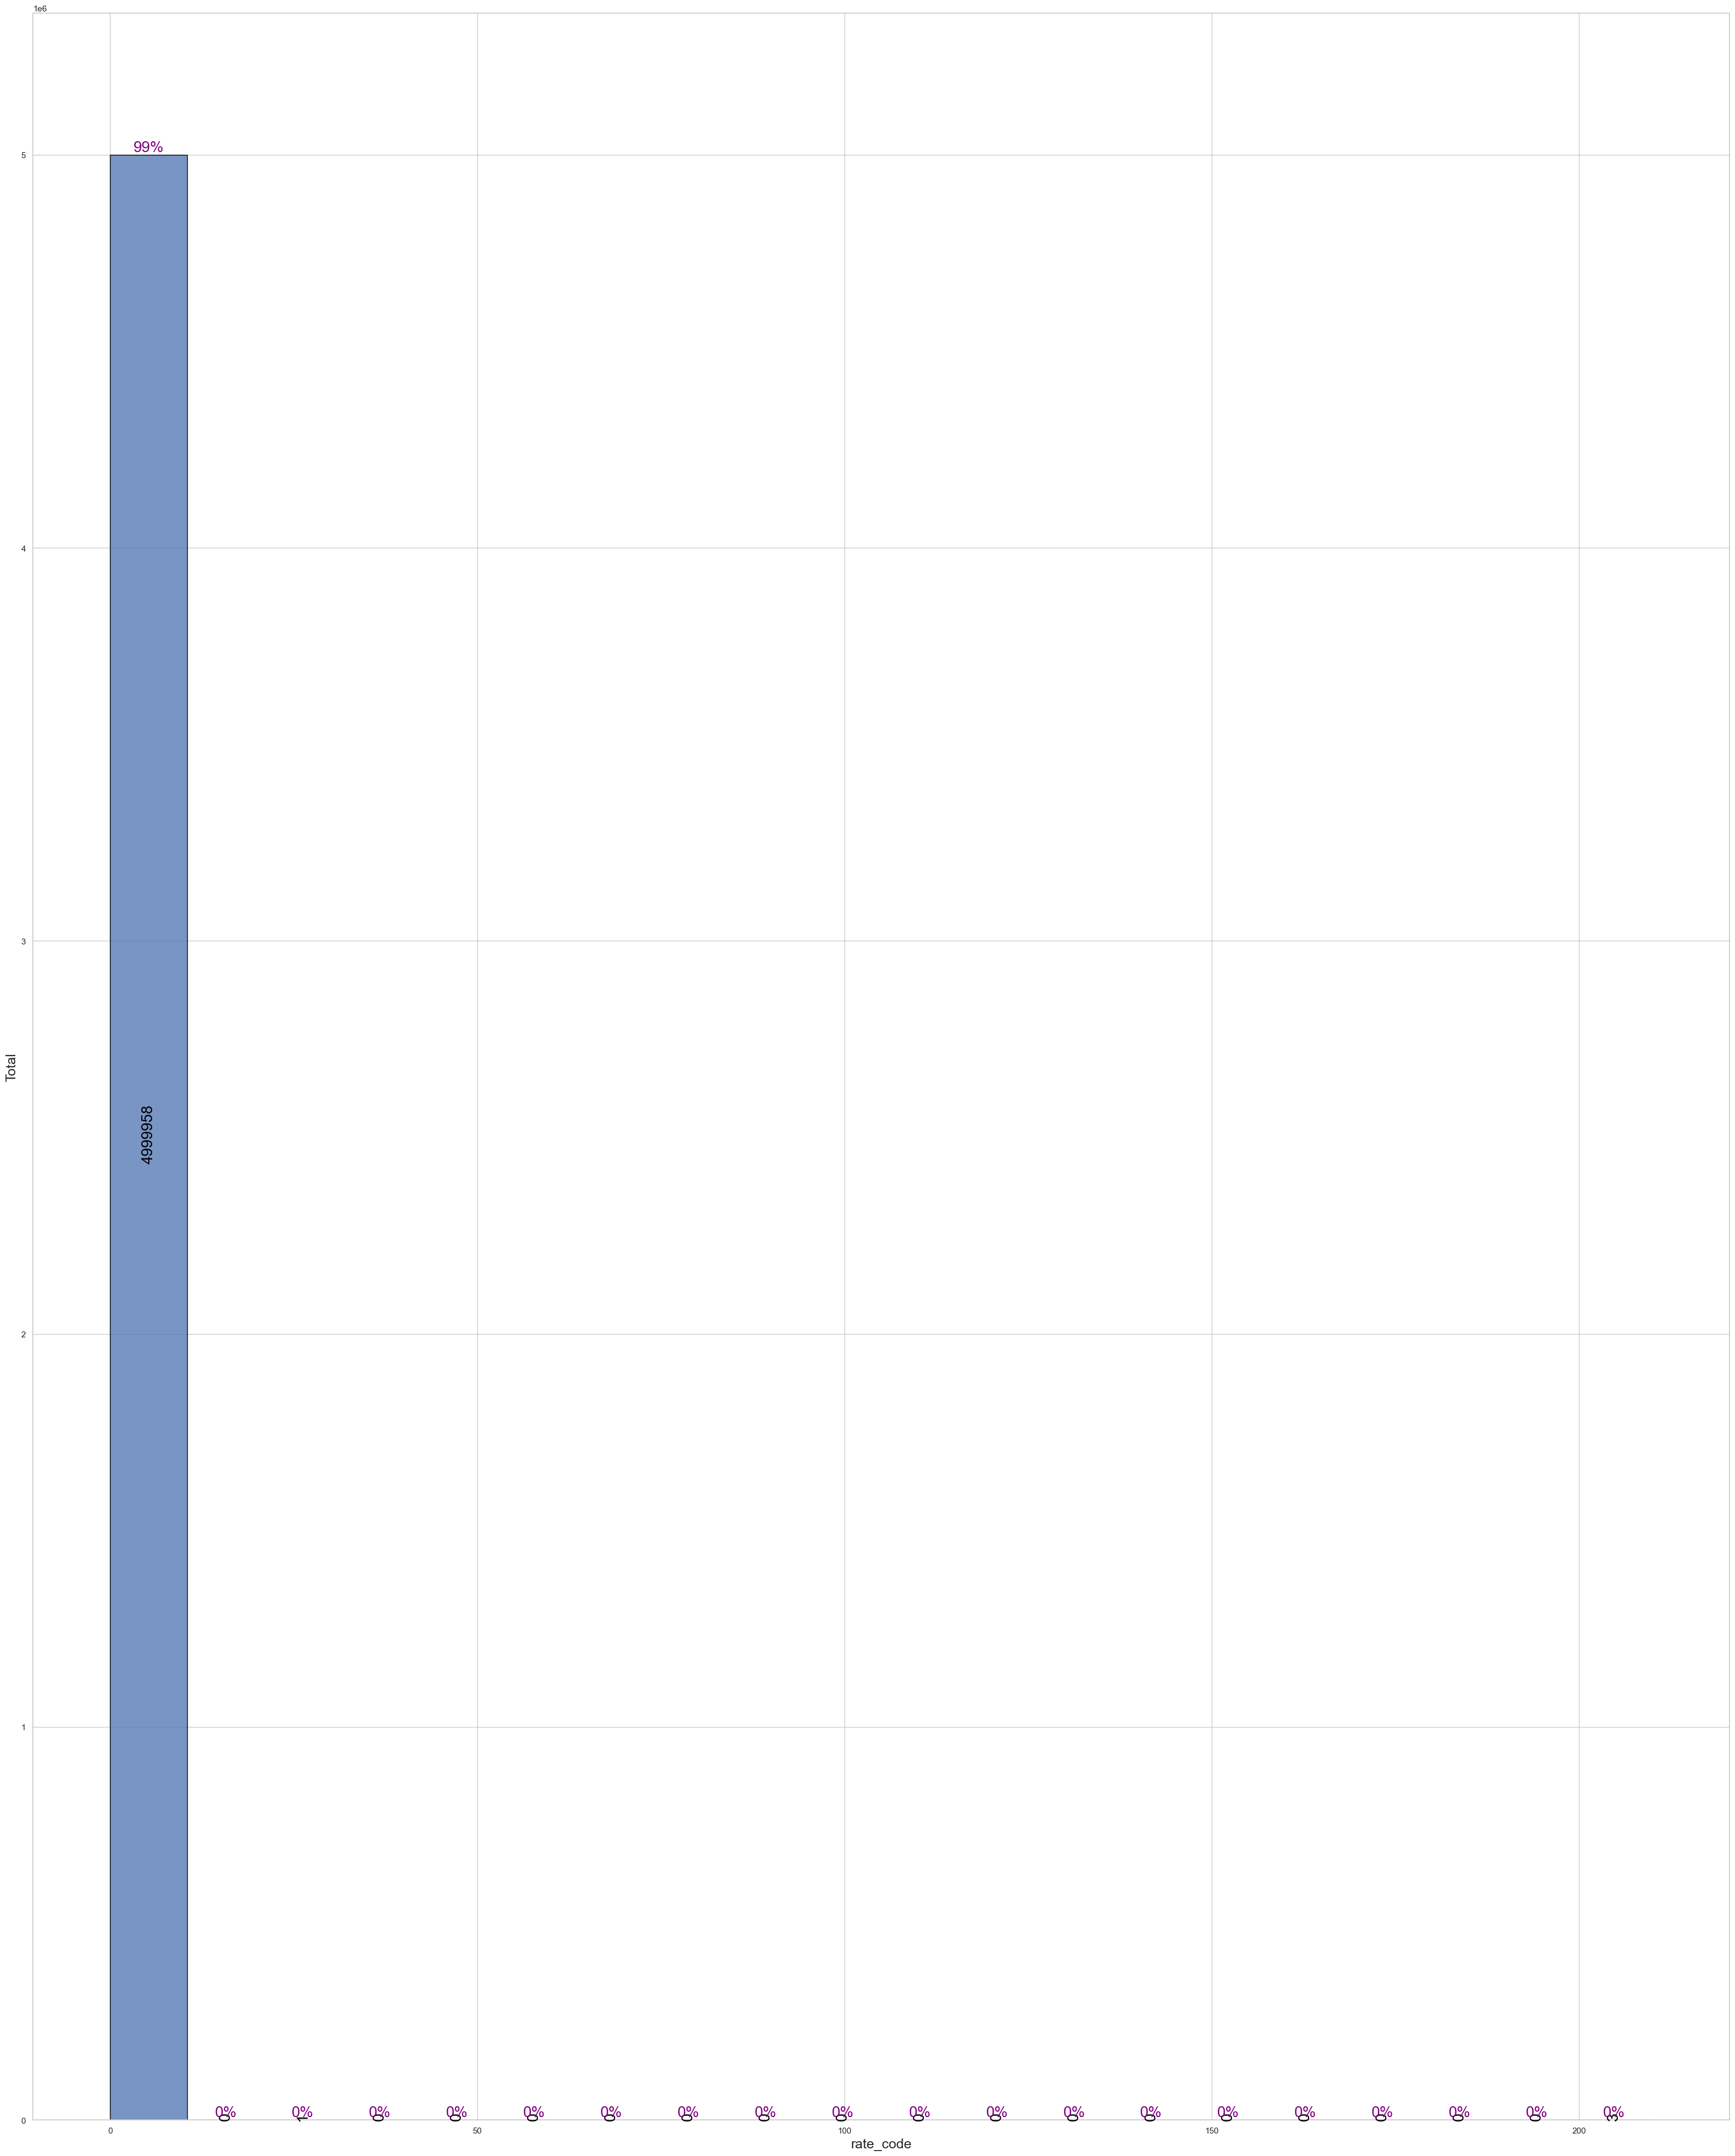

(1, 'passenger_count')


C:\Users\victo\AppData\Local\Temp\ipykernel_13472\1634940841.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data[i[1]], bins=20 , palette=colors, edgecolor='black')
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


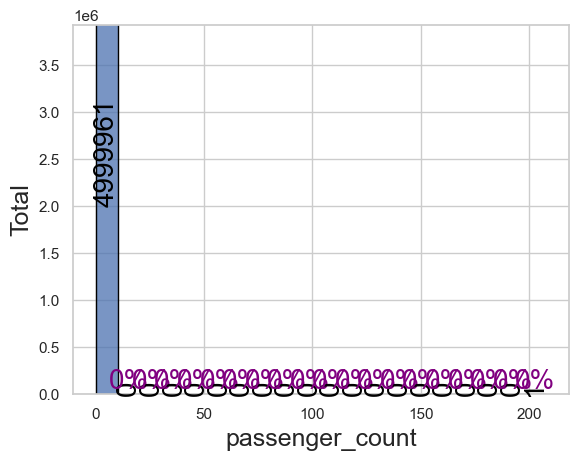

(2, 'trip_time_in_secs')


C:\Users\victo\AppData\Local\Temp\ipykernel_13472\1634940841.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data[i[1]], bins=20 , palette=colors, edgecolor='black')
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


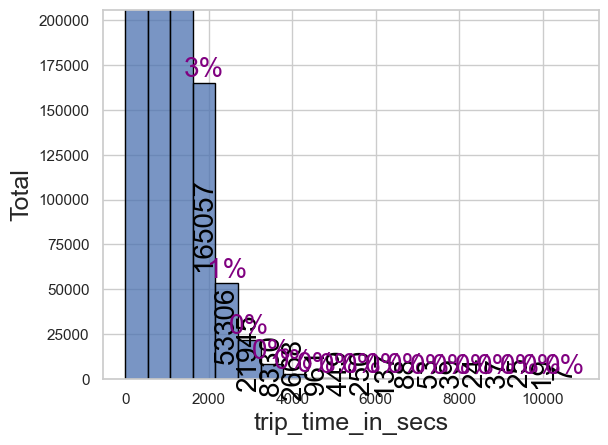

(3, 'trip_distance')


C:\Users\victo\AppData\Local\Temp\ipykernel_13472\1634940841.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data[i[1]], bins=20 , palette=colors, edgecolor='black')
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


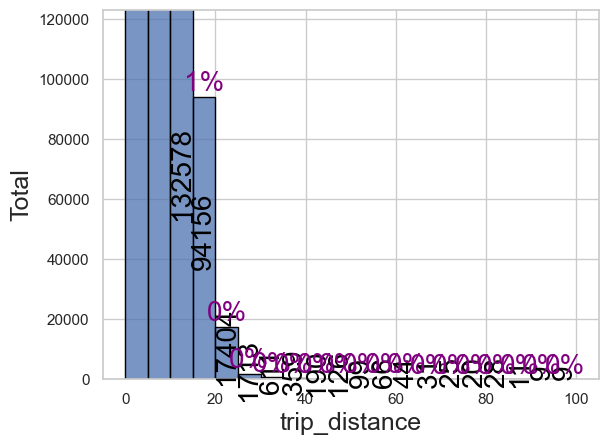

(4, 'pickup_longitude')


C:\Users\victo\AppData\Local\Temp\ipykernel_13472\1634940841.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data[i[1]], bins=20 , palette=colors, edgecolor='black')
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


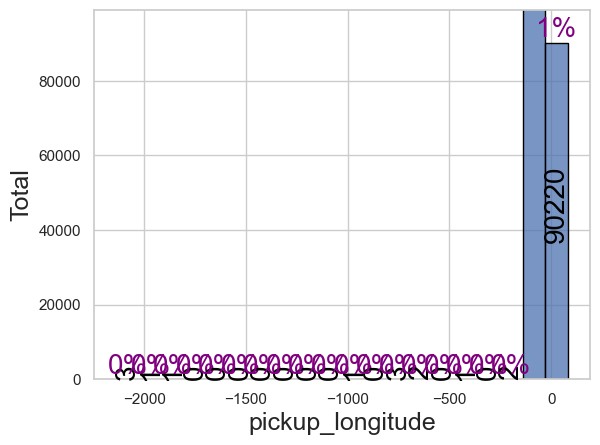

(5, 'pickup_latitude')


C:\Users\victo\AppData\Local\Temp\ipykernel_13472\1634940841.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data[i[1]], bins=20 , palette=colors, edgecolor='black')
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


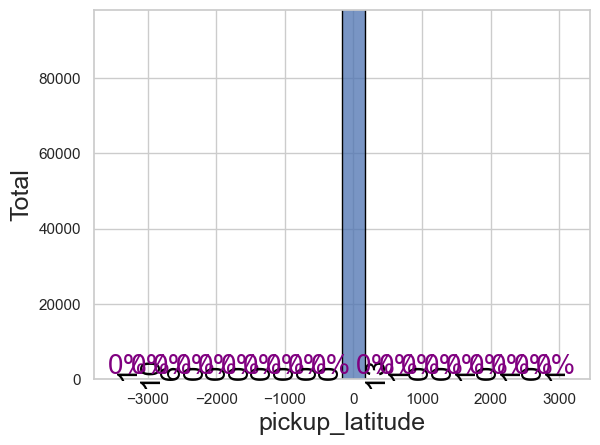

(6, 'dropoff_longitude')


C:\Users\victo\AppData\Local\Temp\ipykernel_13472\1634940841.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data[i[1]], bins=20 , palette=colors, edgecolor='black')
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


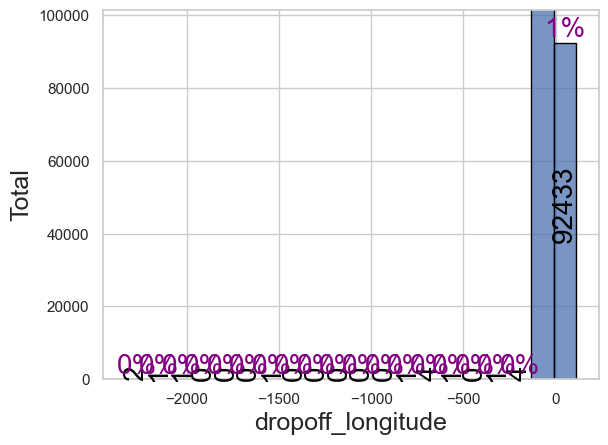

(7, 'dropoff_latitude')


C:\Users\victo\AppData\Local\Temp\ipykernel_13472\1634940841.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data[i[1]], bins=20 , palette=colors, edgecolor='black')
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


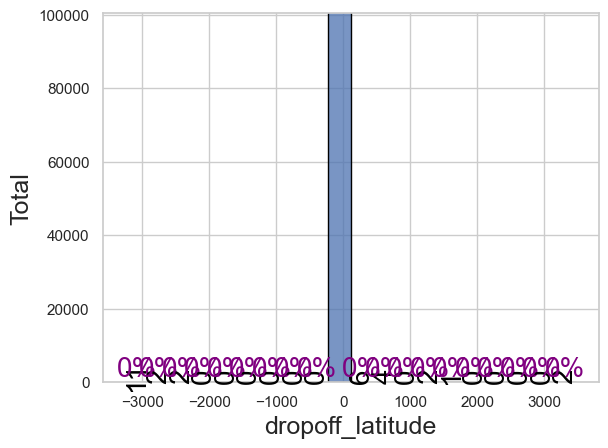

(8, 'fare_amount')


C:\Users\victo\AppData\Local\Temp\ipykernel_13472\1634940841.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data[i[1]], bins=20 , palette=colors, edgecolor='black')
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


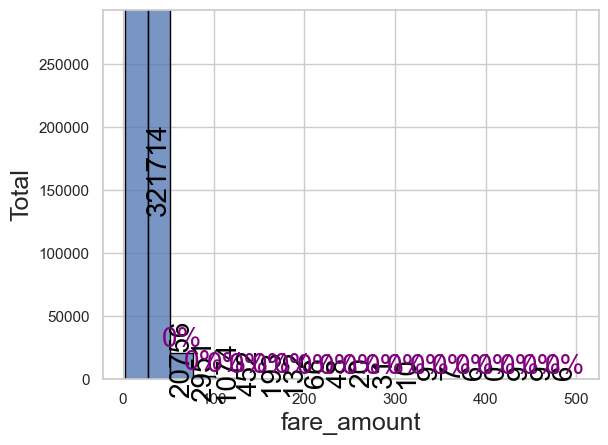

(9, 'surcharge')


C:\Users\victo\AppData\Local\Temp\ipykernel_13472\1634940841.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data[i[1]], bins=20 , palette=colors, edgecolor='black')
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


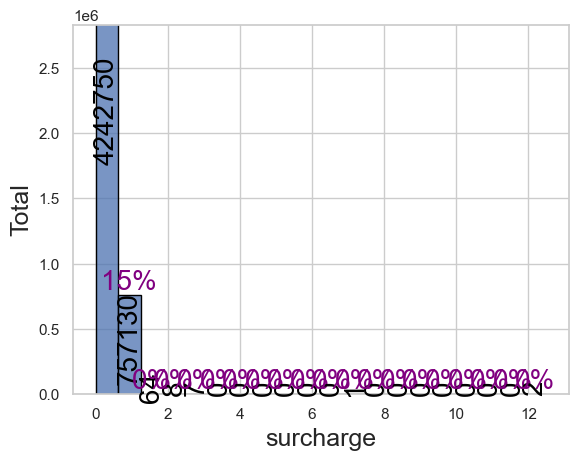

(10, 'mta_tax')


C:\Users\victo\AppData\Local\Temp\ipykernel_13472\1634940841.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data[i[1]], bins=20 , palette=colors, edgecolor='black')
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


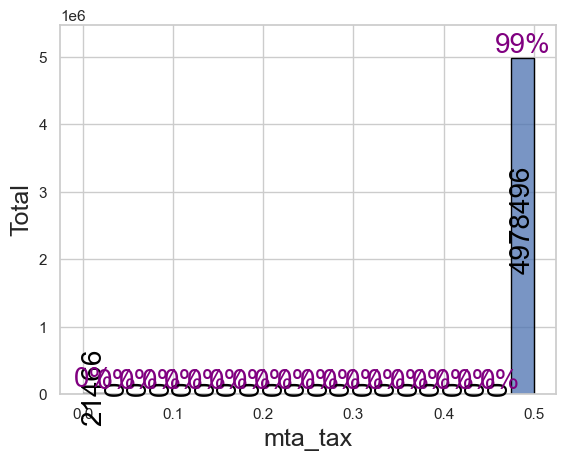

(11, 'tip_amount')


C:\Users\victo\AppData\Local\Temp\ipykernel_13472\1634940841.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data[i[1]], bins=20 , palette=colors, edgecolor='black')
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


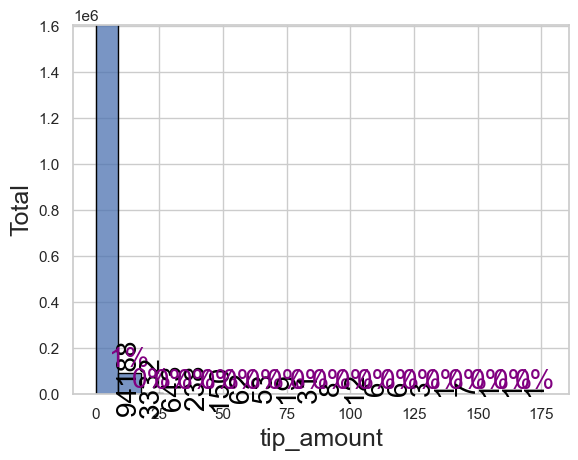

(12, 'tolls_amount')


C:\Users\victo\AppData\Local\Temp\ipykernel_13472\1634940841.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data[i[1]], bins=20 , palette=colors, edgecolor='black')
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


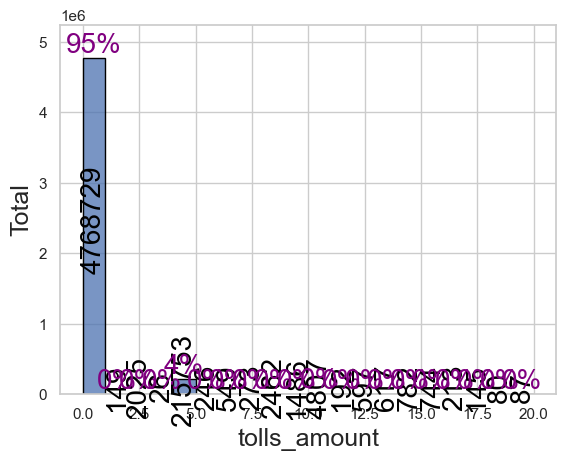

(13, 'total_amount')


C:\Users\victo\AppData\Local\Temp\ipykernel_13472\1634940841.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data[i[1]], bins=20 , palette=colors, edgecolor='black')
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


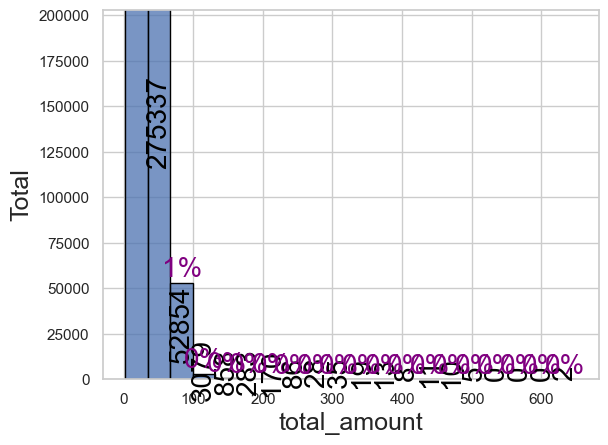

In [16]:
#Más graficos para explorar los datos variables continuas


graficos_histo = data.select_dtypes(exclude='object').columns.tolist()
lista_graficos_histo = list(enumerate(graficos_histo))
q_graficos = int(len(lista_graficos_histo)/2)


#configurando area de grafico
sns.set(style="whitegrid")
colors = sns.color_palette(['navy', 'purple'])
plt.figure(figsize=(40,30))
#plt.subplots_adjust(hspace=0.3)

for i in lista_graficos_histo:
        print(i)
        #plt.subplot(q_graficos, 2, i[0]+1)
        #ax = sns.countplot(x=i[1], data=data,palette=colors)
        ax = sns.histplot(data[i[1]], bins=20 , palette=colors, edgecolor='black')
        plt.xlabel(i[1], fontsize=18)
        plt.ylabel('Total', fontsize=18)
        for p in ax.patches:
            x_pos = p.get_x() + p.get_width() / 2.
            y_pos_abs = p.get_height() / 2 + p.get_y()  # Para centrar absolutos :)
            y_pos_prop = p.get_height() / total_observaciones + p.get_y()  # Para centrar proporciones :)
            ax.annotate(f'{p.get_height():.0f}', (x_pos, y_pos_abs),
                        ha='center', va='center', fontsize=20, color='black', xytext=(0, 5),
                        textcoords='offset points', rotation=90,)
            porcentaje = p.get_height() / total_observaciones * 100
            ax.annotate(f'{int(porcentaje)}%', (x_pos, p.get_height()),
                        ha='center', va='bottom', fontsize=20, color='purple')

            ax.set_ylim(0, data[i[1]].value_counts().max() * 1.1)
        plt.show()

(-74.05, -73.9)

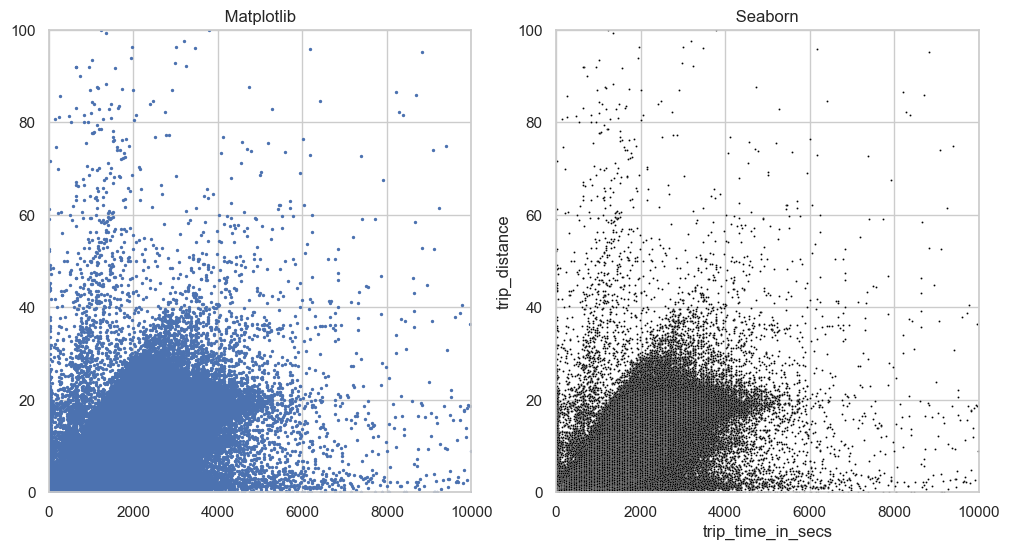

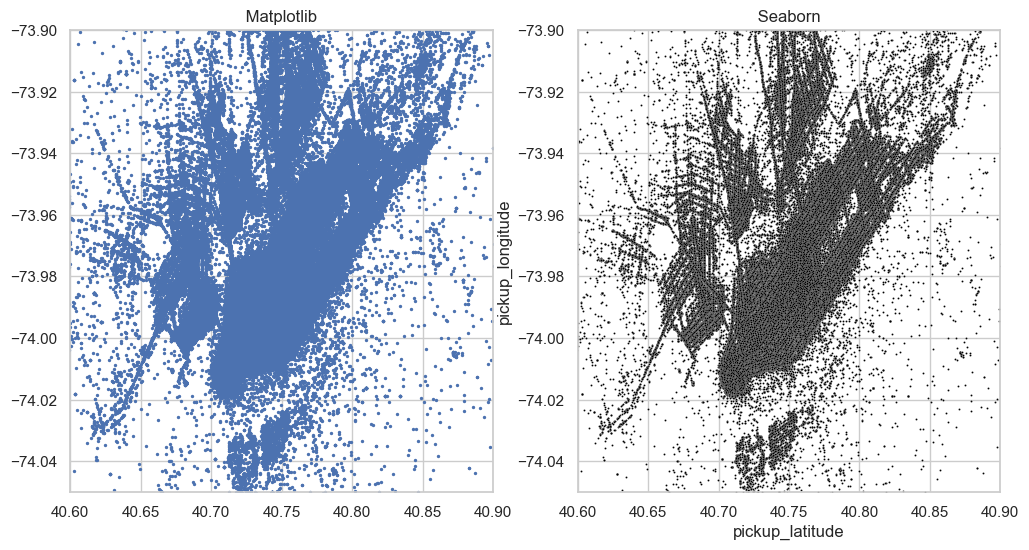

In [17]:
#graficos scatter
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.scatter(x=data['trip_time_in_secs'], y=data['trip_distance'],  s=2)
plt.title(' Matplotlib ')
plt.xlim(0,10000)
plt.ylim(0,100)

plt.subplot(1,2,2)
sns.scatterplot(x="trip_time_in_secs", y="trip_distance", data=data, color="black", s=2)
plt.title(' Seaborn ')
plt.xlim(0,10000)
plt.ylim(0,100)

plt.figure(figsize=(12,6))

min = 0
max = 50
plt.subplot(1,2,1)
plt.scatter(x=data['pickup_latitude'], y=data['pickup_longitude'],  s=2)
plt.title(' Matplotlib ')
plt.xlim(40.6, 40.9)
plt.ylim(-74.05, -73.9)


plt.subplot(1,2,2)
sns.scatterplot(x="pickup_latitude", y="pickup_longitude", data=data, color="black", s=2)
plt.title(' Seaborn ')
plt.xlim(40.6, 40.9)
plt.ylim(-74.05, -73.9)

# Construyendo un modelos
## 


# NORMALIZANDO; ESCALANDO ; ESTANDARINZADO

In [18]:
# Se utiliza estandard Scaler

#Normalizando el target 'tip_amount]

data['tipped'] = (data['tip_amount'] > 0).astype("int")
columnas = ['rate_code','passenger_count','trip_time_in_secs','trip_distance','pickup_longitude','pickup_latitude','dropoff_longitude',
           'dropoff_latitude','fare_amount', 'surcharge', 'mta_tax','tolls_amount']

sc = StandardScaler()
data_scaled    = sc.fit_transform(data[columnas])
data_scaled_df = pd.DataFrame(data_scaled, columns=columnas)
data_scaled_df.shape

(4999962, 12)

# REvisando visualmente impacto del escalamiento

# Hisitograms de variables categoricas
## no se revisan las variabkes catagorias, pues la frecuencia se debe mantener


# MATRIZ DE CORRELACION

Text(0.5, 1.0, 'Matriz de Correlación')

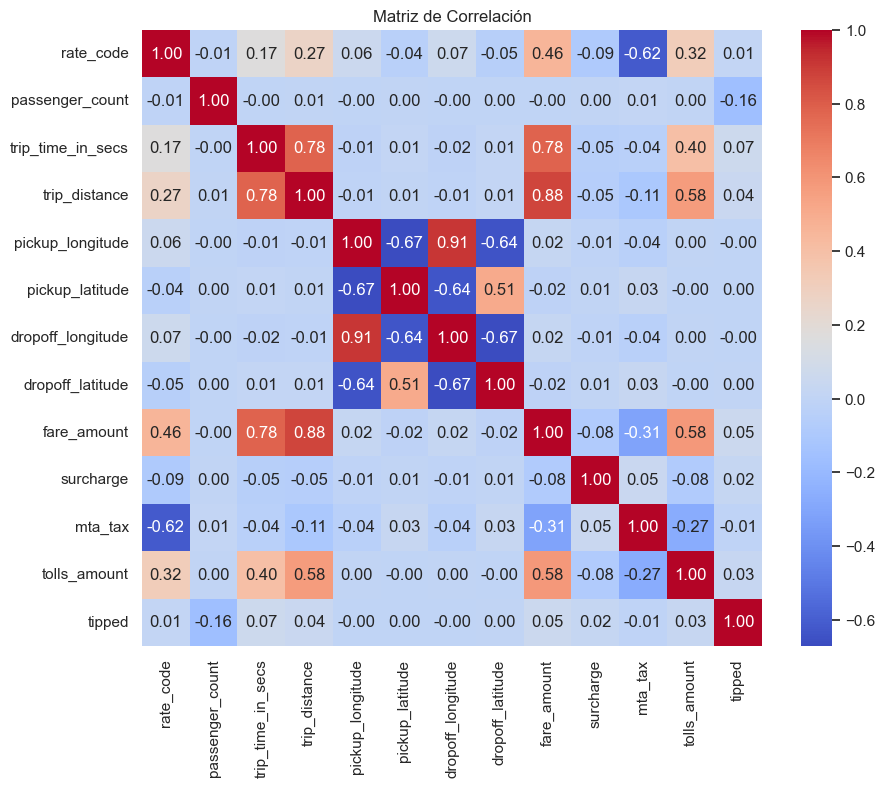

In [19]:
# EDA Matriz de correlación
columnas = ['rate_code','passenger_count','trip_time_in_secs','trip_distance','pickup_longitude','pickup_latitude','dropoff_longitude',
           'dropoff_latitude','fare_amount', 'surcharge', 'mta_tax','tolls_amount']

data_scaled_df['tipped'] = data['tipped']
matriz_de_correlacion = data_scaled_df.corr()
data_scaled_df.drop(columns='tipped',inplace = True)

# Crea un mapa de calor utilizando seaborn
plt.figure(figsize=(10, 8)) 

sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm', fmt=".2f")  

# Añade títulos y etiquetas
plt.title('Matriz de Correlación')
#plt.show()



# DIVIDIENDO DATOS PRA ENTRENAMIENTO Y PARA TEST 0.2

In [20]:
# Split al 20 %

y = data['tipped']
X_train, X_test, y_train, y_test = train_test_split(data_scaled_df, y, test_size=0.2, random_state=42)

# GLOSARIO

## Accuracy: Predicciones correctas dividido el número total de predicciones.
## Precisión: Verdaderos positivos dividido el total de instancias clasificas como positivas. Hay que prestarle atención cuando queremos minimizar los falsos positivos (Error de tipo 1)
## Recall: Es la fracción de instancias positivas que el modelo predijo de forma correcta. Es la cantidad de verdaderos positivos dividido el total de instancias verdaderamente positivas. Es importante cuando queremos minimizar los falsos negativos (Error de tipo 2)

## F1-Score: Combinación de la precisión y el recall en un solo valor.

## AUC-ROC: Es el área bajo la curva ROC. La curva ROC representa graficamente la tasa de verdaderos positivos frente a la tasa de falsos positivos. Proporciona una medida de la capacidad de discriminación del modelo. Los valores cercanos a 1 indican un buen rendimiento del modelo.

# ¿Cuál de estos modelos seleccionarias y por qué?
Tras realizar varias pruebas, el modelo que muestra mejores resultados al analizar las matrices de confusión es el modelo Random Forest. Teniendo la menor cantidad de falsos positivos, es decir, nos permite evitar el error de tipo 1. A su vez, es el modelo que ha detectado mayor cantidad de verdaderos positivos.

# ¿Qué es una matrix de confusión?
Es una tabla utilizada en el analisis de clasificación para evalular el rendimiento de un modelo. Nos muestra la cantidad de predicciones correctas e incorrectas realizadas por nuestro modelo en comparación con los valores reales en el conjunto de datos de prueba. Es decir, permite ver el comportamiento del clasificar con base en los errores de tipo 1 y tipo 2.

Las celdas típicas en una matriz de confusión incluyen:

Verdaderos positivos (TP): Instancias positivas que fueron correctamente clasificadas como positivas.

Verdaderos negativos (TN): Instancias negativas que fueron correctamente clasificadas como negativas.

Falsos positivos (FP): Instancias negativas que fueron incorrectamente clasificadas como positivas.

Falsos negativos (FN): Instancias positivas que fueron incorrectamente clasificadas como negativas.

In [42]:
# acunulacion de metricas por modelo

metricas = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

# 1.- Modelo SGDClassifier

In [43]:
# splicando el modelo 
from sklearn.metrics import accuracy_score

# entrenando
sgd = SGDClassifier(loss="modified_huber")
sgd.fit(X_train,y_train)

# Predicciondo
y_pred = sgd.predict(X_test)

#evaluando

# Calcula el AUC
if hasattr(sgd, "predict_proba"):
   y_pred_roc = sgd.predict_proba(X_test)
   roc_auc    = roc_auc_score(y_test, y_pred_roc[:, 1])
  
   # Calcula fpr, tpr y umbrales (thr)
   fpr, tpr, thr = roc_curve(y_test, y_pred_roc[:, 1])
else:
   roc_auc = None
print("AUC:", roc_auc)

# Calcula la exactitud (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcula la precisión (precision)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calcula la exhaustividad (recall)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calcula la puntuación F1 (F1-score)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Incorporar métricas a la lista de resultados
metricas['Model'].append('SGDClassifier')
metricas['Accuracy'].append(accuracy)
metricas['Precision'].append(precision)
metricas['Recall'].append(recall)
metricas['F1-score'].append(f1)
metricas['AUC-ROC'].append(roc_auc)
metricas

AUC: 0.6064502604403308
Accuracy: 0.711101977713844
Precision: 0.7179769166821867
Recall: 0.9748044576728733
F1 Score: 0.8269078446762491


{'Model': ['SGDClassifier'],
 'Accuracy': [0.711101977713844],
 'Precision': [0.7179769166821867],
 'Recall': [0.9748044576728733],
 'F1-score': [0.8269078446762491],
 'AUC-ROC': [0.6064502604403308]}

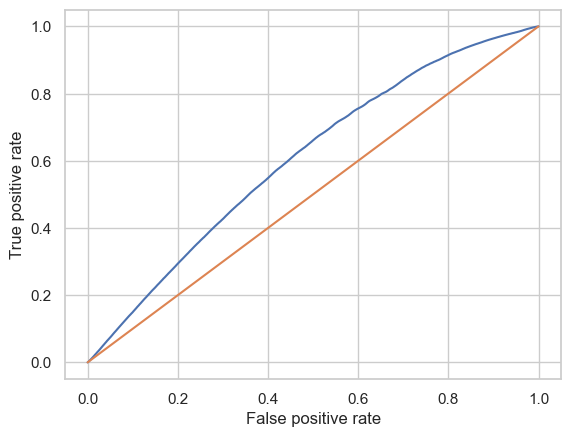

In [44]:
# Graficando 
if hasattr(sgd, "predict_proba"):
    plt.plot(fpr,tpr)
    plt.plot(fpr,fpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
else:
    print('No existe  probabilidades estimadas para este modelo')

[[ 21030 271060]
 [ 17836 690067]]


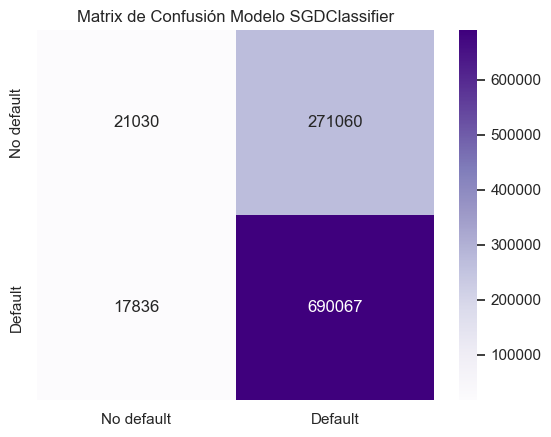

In [45]:
#Matriz Confusion

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['No default', 'Default'], yticklabels=['No default', 'Default'])
#plt.title(f'Matrix de Confusión {name}')
plt.title(f'Matrix de Confusión Modelo SGDClassifier')
plt.show()


#  COEFICIENTES O VARIABLES IMPORTANTES CUANDO CORRESPONDA

In [46]:

# Obtener los nombres de las características
nombres_caracteristicas = X.columns

# Obtener los coeficientes de las características
coeficientes = sgd.coef_

# Crear un DataFrame con los coeficientes y los nombres de las características
df_coeficientes = pd.DataFrame({'Caracteristica': nombres_caracteristicas, 'Coeficiente': coeficientes[0]})

# Mostrar el DataFrame de coeficientes
print(df_coeficientes)

 rate_code : Coeficiente: -0.014738181284421907
 passenger_count : Coeficiente: -0.14509469676366601
 trip_time_in_secs : Coeficiente: 0.07868759739921577
 trip_distance : Coeficiente: -0.0471974123988586
 pickup_longitude : Coeficiente: 0.101922429035583
 pickup_latitude : Coeficiente: 0.10817818997160861
 dropoff_longitude : Coeficiente: 0.026070492925378684
 dropoff_latitude : Coeficiente: 0.05941113341294712
 fare_amount : Coeficiente: 0.02415752424574196
 surcharge : Coeficiente: 0.020453038302811713
 mta_tax : Coeficiente: -0.013315247057650434
 tolls_amount : Coeficiente: 0.007127509711570015


# 2.- Modelo RandomForest

In [47]:
# Asplicando el modelo 

# entrenando
rf = RandomForestClassifier(n_estimators=100, n_jobs=4)
rf.fit(X_train,y_train)

# Predicciondo
y_pred = rf.predict(X_test)

#evaluando
# Calcula el AUC
if hasattr(rf , "predict_proba"):
   y_pred_roc = rf.predict_proba(X_test)
   roc_auc    = roc_auc_score(y_test, y_pred_roc[:, 1])
  
   # Calcula fpr, tpr y umbrales (thr)
   fpr, tpr, thr = roc_curve(y_test, y_pred_roc[:, 1])
else:
   roc_auc = None
print("AUC:", roc_auc)

# Calcula la exactitud (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcula la precisión (precision)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calcula la exhaustividad (recall)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calcula la puntuación F1 (F1-score)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Incorporar métricas a la lista de resultados
metricas['Model'].append('RandomForest')
metricas['Accuracy'].append(accuracy)
metricas['Precision'].append(precision)
metricas['Recall'].append(recall)
metricas['F1-score'].append(f1)
metricas['AUC-ROC'].append(roc_auc)
metricas



AUC: 0.7781314463055012
Accuracy: 0.7441882093174652
Precision: 0.782463852689165
Recall: 0.8845562174478707
F1 Score: 0.830383842670256


{'Model': ['SGDClassifier', 'SGDClassifier'],
 'Accuracy': [0.711101977713844, 0.7441882093174652],
 'Precision': [0.7179769166821867, 0.782463852689165],
 'Recall': [0.9748044576728733, 0.8845562174478707],
 'F1-score': [0.8269078446762491, 0.830383842670256],
 'AUC-ROC': [0.6064502604403308, 0.7781314463055012]}

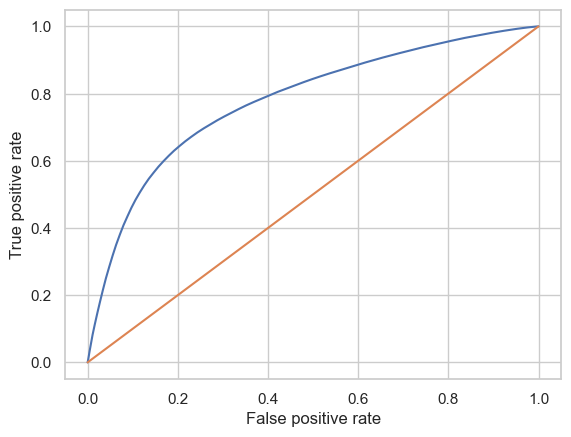

In [48]:
# Graficando 
if hasattr(rd, "predict_proba"):
    plt.plot(fpr,tpr)
    plt.plot(fpr,fpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
else:
    print('No existe  probabilidades estimadas para este modelo')

[[118003 174087]
 [ 81723 626180]]


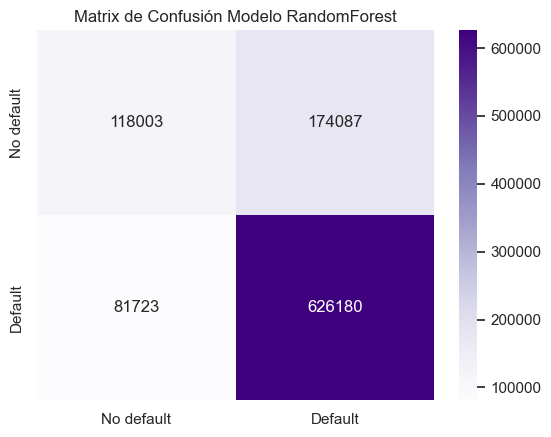

In [49]:
#Matriz Confusion

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['No default', 'Default'], yticklabels=['No default', 'Default'])
#plt.title(f'Matrix de Confusión {name}')
plt.title(f'Matrix de Confusión Modelo RandomForest')
plt.show()


# REvisando Variables Importantes.

In [50]:
# Suponiendo que 'clumnas  es una lista de nombres de características y 'rf1' es tu modelo RandomForestClassifier entrenado
fi = list(zip(columnas, rf.feature_importances_))

# Crea un DataFrame de pandas para mostrar las características y sus importancias
df_importancia = pd.DataFrame(fi, columns=["Feature", "Importance"])
print(df_importancia.sort_values(by='Importance', ascending=False))


              Feature  Importance
2   trip_time_in_secs    0.163489
7    dropoff_latitude    0.148715
6   dropoff_longitude    0.147203
5     pickup_latitude    0.146957
4    pickup_longitude    0.144819
3       trip_distance    0.142688
8         fare_amount    0.054522
1     passenger_count    0.034846
9           surcharge    0.013400
11       tolls_amount    0.001989
0           rate_code    0.001159
10            mta_tax    0.000212


# 3.- Modelo DecisionTreeClassifier (scikit-learn)

In [53]:
# Asplicando el modelo 


# Crear una instancia del clasificador DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Entrenar el modelo
dt.fit(X_train, y_train)

# Predicciondo
y_pred = dt.predict(X_test)

#evaluando
# Calcula el AUC
if hasattr(dt , "predict_proba"):
   y_pred_roc = dt.predict_proba(X_test)
   roc_auc    = roc_auc_score(y_test, y_pred_roc[:, 1])
  
   # Calcula fpr, tpr y umbrales (thr)
   fpr, tpr, thr = roc_curve(y_test, y_pred_roc[:, 1])
else:
   roc_auc = None
print("AUC:", roc_auc)

# Calcula la exactitud (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcula la precisión (precision)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calcula la exhaustividad (recall)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calcula la puntuación F1 (F1-score)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Incorporar métricas a la lista de resultados
metricas['Model'].append('DecisionTreeClassifier')
metricas['Accuracy'].append(accuracy)
metricas['Precision'].append(precision)
metricas['Recall'].append(recall)
metricas['F1-score'].append(f1)
metricas['AUC-ROC'].append(roc_auc)
metricas


AUC: 0.6245394056643551
Accuracy: 0.686692806849648
Precision: 0.7812554348290933
Recall: 0.7741823385407323
F1 Score: 0.777702804816528


{'Model': ['SGDClassifier', 'RandomForest', 'DecisionTreeClassifier'],
 'Accuracy': [0.711101977713844, 0.7441882093174652, 0.686692806849648],
 'Precision': [0.7179769166821867, 0.782463852689165, 0.7812554348290933],
 'Recall': [0.9748044576728733, 0.8845562174478707, 0.7741823385407323],
 'F1-score': [0.8269078446762491, 0.830383842670256, 0.777702804816528],
 'AUC-ROC': [0.6064502604403308, 0.7781314463055012, 0.6245394056643551]}

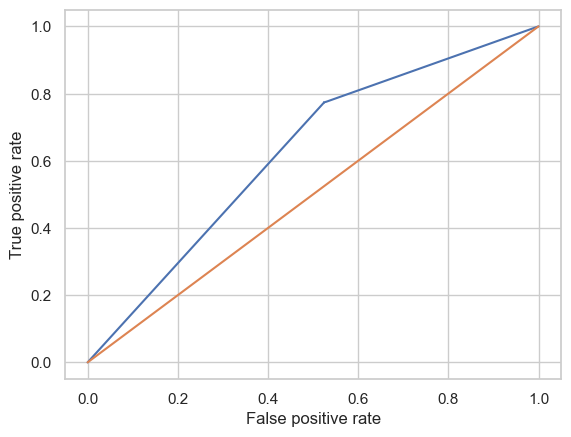

In [54]:
# Graficando 
if hasattr(dt, "predict_proba"):
    plt.plot(fpr,tpr)
    plt.plot(fpr,fpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
else:
    print('No existe  probabilidades estimadas para este modelo')


[[138642 153448]
 [159857 548046]]


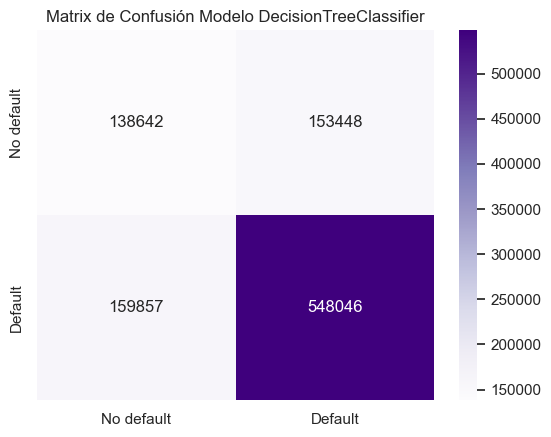

In [55]:
#Matriz Confusion

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['No default', 'Default'], yticklabels=['No default', 'Default'])
#plt.title(f'Matrix de Confusión {name}')
plt.title(f'Matrix de Confusión Modelo DecisionTreeClassifier')
plt.show()

# REvisando Variables Importantes.

In [56]:
# Suponiendo que 'clumnas  es una lista de nombres de características y 'rf1' es tu modelo RandomForestClassifier entrenado
fi_dt = list(zip(columnas, dt.feature_importances_))

# Crea un DataFrame de pandas para mostrar las características y sus importancias
df_importancia_dt = pd.DataFrame(fi_dt, columns=["Feature", "Importance"])
print(df_importancia_dt.sort_values(by='Importance', ascending=False))

              Feature  Importance
2   trip_time_in_secs    0.219409
7    dropoff_latitude    0.146240
6   dropoff_longitude    0.145277
5     pickup_latitude    0.144382
4    pickup_longitude    0.142687
3       trip_distance    0.106163
8         fare_amount    0.039769
1     passenger_count    0.038807
9           surcharge    0.014415
11       tolls_amount    0.002019
0           rate_code    0.000699
10            mta_tax    0.000132


# 4.-. Modelo Naive Bayes

In [57]:
# Asplicando el modelo 


# Crear una instancia del clasificador Naive Bayes
nb = GaussianNB()

# Entrenar el modelo
nb.fit(X_train, y_train)

# Predicciondo
y_pred = nb.predict(X_test)

#evaluando
# Calcula el AUC
if hasattr(nb , "predict_proba"):
   y_pred_roc = nb.predict_proba(X_test)
   roc_auc    = roc_auc_score(y_test, y_pred_roc[:, 1])
  
   # Calcula fpr, tpr y umbrales (thr)
   fpr, tpr, thr = roc_curve(y_test, y_pred_roc[:, 1])
else:
   roc_auc = None
print("AUC:", roc_auc)

# Calcula la exactitud (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcula la precisión (precision)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calcula la exhaustividad (recall)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calcula la puntuación F1 (F1-score)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Incorporar métricas a la lista de resultados
metricas['Model'].append('NaiveBayes')
metricas['Accuracy'].append(accuracy)
metricas['Precision'].append(precision)
metricas['Recall'].append(recall)
metricas['F1-score'].append(f1)
metricas['AUC-ROC'].append(roc_auc)
metricas



AUC: 0.605553285228002
Accuracy: 0.7030149211044477
Precision: 0.7303983134475643
Recall: 0.9200978100106936
F1 Score: 0.8143465217361406


{'Model': ['SGDClassifier',
  'RandomForest',
  'DecisionTreeClassifier',
  'NaiveBayes'],
 'Accuracy': [0.711101977713844,
  0.7441882093174652,
  0.686692806849648,
  0.7030149211044477],
 'Precision': [0.7179769166821867,
  0.782463852689165,
  0.7812554348290933,
  0.7303983134475643],
 'Recall': [0.9748044576728733,
  0.8845562174478707,
  0.7741823385407323,
  0.9200978100106936],
 'F1-score': [0.8269078446762491,
  0.830383842670256,
  0.777702804816528,
  0.8143465217361406],
 'AUC-ROC': [0.6064502604403308,
  0.7781314463055012,
  0.6245394056643551,
  0.605553285228002]}

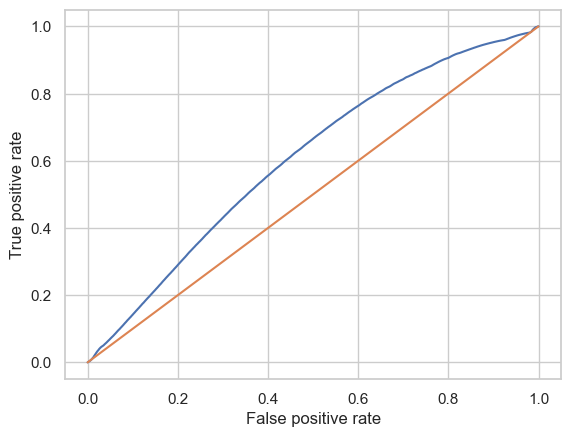

In [58]:
# Graficando 
if hasattr(nb, "predict_proba"):
    plt.plot(fpr,tpr)
    plt.plot(fpr,fpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
else:
    print('No existe  probabilidades estimadas para este modelo')

[[ 51670 240420]
 [ 56563 651340]]


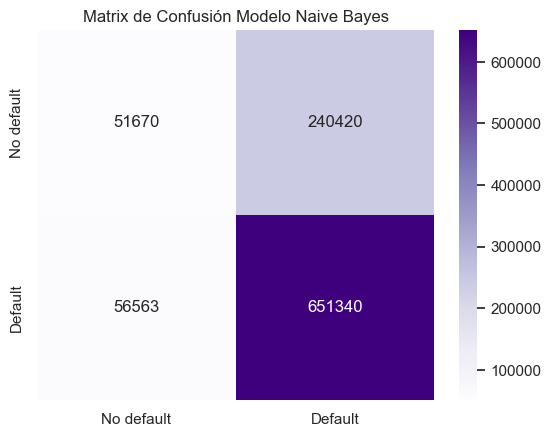

In [59]:
#Matriz Confusion

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['No default', 'Default'], yticklabels=['No default', 'Default'])
#plt.title(f'Matrix de Confusión {name}')
plt.title(f'Matrix de Confusión Modelo Naive Bayes')
plt.show()

# 5.- Modelo Support Vector Machines (SVM)

In [ ]:
# Asplicando el modelo 


# Crear una instancia del clasificador SVM
svm = SVC(kernel='linear', probability=True, random_state=42)

# Entrenar el modelo
svm.fit(X_train, y_train)

# Predicciondo
y_pred = svm.predict(X_test)

#evaluando
# Calcula el AUC
if hasattr(svm , "predict_proba"):
   y_pred_roc = svm.predict_proba(X_test)
   roc_auc    = roc_auc_score(y_test, y_pred_roc[:, 1])
  
   # Calcula fpr, tpr y umbrales (thr)
   fpr, tpr, thr = roc_curve(y_test, y_pred_roc[:, 1])
else:
   roc_auc = None
print("AUC:", roc_auc)

# Calcula la exactitud (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcula la precisión (precision)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calcula la exhaustividad (recall)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calcula la puntuación F1 (F1-score)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Incorporar métricas a la lista de resultados
metricas['Model'].append('SupportVectorMachines')
metricas['Accuracy'].append(accuracy)
metricas['Precision'].append(precision)
metricas['Recall'].append(recall)
metricas['F1-score'].append(f1)
metricas['AUC-ROC'].append(roc_auc)
metricas


In [ ]:
# Graficando 
if hasattr(svm, "predict_proba"):
    plt.plot(fpr,tpr)
    plt.plot(fpr,fpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
else:
    print('No existe  probabilidades estimadas para este modelo')

In [ ]:
#Matriz Confusion

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['No default', 'Default'], yticklabels=['No default', 'Default'])
#plt.title(f'Matrix de Confusión {name}')
plt.title(f'Matrix de Confusión Modelo Support Vector Machines')
plt.show()

# SVM REVISANDO COEFICIENTES

In [ ]:
# Obtener los nombres de las características
nombres_caracteristicas = X.columns

# Obtener los coeficientes de las características
coeficientes = svm.coef_

# Crear un DataFrame con los coeficientes y los nombres de las características
df_coeficientes = pd.DataFrame({'Caracteristica': nombres_caracteristicas, 'Coeficiente': coeficientes[0]})

# Mostrar el DataFrame de coeficientes
print(df_coeficientes)


# GRAFICANDO TODOS LOS RESULTADOS METRICAS Y  SELECCIONAR MODELO

In [ ]:
import numpy as np

crea_modelos3()

metri = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
modelos = resultados['Model']
n_modelos = len(modelos)
ind = np.arange(n_modelos)  # Posiciones de las barras

# Crear gráfico
plt.figure(figsize=(10, 7))

# Anchura de las barras
bar_width = 0.15

# Definir colores para las barras
colores = ['skyblue', 'salmon', 'lightgreen', 'orange', 'pink']

# Dibujar barras para cada métrica
for i, metrica in enumerate(metricas):
    plt.bar(ind + i * bar_width, resultados[metrica], bar_width, label=metrica, color=colores[i])

# Agregar valores de métricas debajo del gráfico
for i, modelo in enumerate(modelos):
    for j, metrica in enumerate(metricas):
        valor = resultados[metrica][i]
        plt.text(ind[i] + j * bar_width - 0.03, valor + 0.005, f'{valor:.2f}', fontsize=8)

# Configuraciones adicionales
plt.xlabel('Modelos')
plt.ylabel('Valor')
plt.title('Comparación de Métricas por Modelo con selección de variables')
plt.xticks(ind + bar_width * (len(metricas) - 1) / 2, modelos)
plt.legend()
plt.tight_layout()

# Mostrar gráfico
plt.show()

## abrir la variable pickup dropoff en hora y dia , sin la vaaribles categorias
## ## luego correos los 5 modelos.

## dumificar las variables categoricas y sumarlas a los dato .  Dummies o OrdinalScaler()
## se deben sumar estas variables : ['vendor_id', 'rate_code', 'passenger_count', 'payment_type
## luego correos los 5 modelos.

In [ ]:
figure(figsize=(16,8))
plot(     data[data['tipped'] == True] ["dropoff_latitude"], 
          data[data['tipped'] == True] ["dropoff_longitude"], 'b,')
plot(data[data['tipped'] == False]["dropoff_latitude"], data[data['tipped'] == False]["dropoff_longitude"], 'r,')
xlim(40.6, 40.9)
ylim(-74.05, -73.9)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Cargamos el conjunto de datos de Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluamos la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Mostramos el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Precisión del modelo: 1.0

Informe de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

